## Using SI9 of Haak et al. 2015 
1. Haak et al. (2015) show that if you have A, R1, R2, where you believe A is a mixture of populations represented by R1 and R2, then when you compare f4(A, R1; O, O) and f2(A, R2; O, O) and you find a negative slope, then this is evidence supporting A is admixed. This is a stronger test than f3-statistics being negative (p. 106 of SI9)

2. ""The method uses the intuition that the reference populations are not identically related to a panel of “focal” or “outgroup” populations, but share different amounts of genetic drift with them as a result of their deep evolutionary history (which is, however, not explicitly modeled). These “outgroups” must be devoid of recent gene flow with either the Test or the candidate reference population, as such gene flow introduces additional common genetic drift. One way to identify them is to pick a varied set of world populations that are (i) geographically remote from the area under study, and (ii) do not show evidence of admixture from that area using an algorithm such as ADMIXTURE1 that can identify recently admixed populations and individuals."" (p. 94, SI9)

In [89]:
%%writefile /mnt/solexa/mel_yang/neolithic/adm_haakSI9/calcf4.py

import plotting_funcs as pf
import os
#import HOdata

pD="/mnt/solexa/mel_yang/bronzeage/data/" #ivpp
outpd="/mnt/solexa/mel_yang/neolithic/adm_haakSI9/" #ivpp
#pD="/home/melinda_yang/data/HO_bronzeage/" #mpi
#outpd="/home/melinda_yang/projects/neolithic/adm_haakSI9/" #mpi

outgroups=["Ju_hoan_North","Mbuti","Yoruba","UstIshim","Vestonice16","ElMiron","Tianyuan",
          "Papuan","Onge","Loschbour","Stuttgart"]
outgroups2=["Ju_hoan_North","Mbuti","Yoruba","Dinka","UstIshim","Oase1","Kostenki14","Vestonice16","ElMiron",
           "Tianyuan","Papuan","Onge"]
weas=['Tibetan_Shannan','Tibetan_Chamdo','Tibetan_Gangcha','Zongri', 'Chokhopani', 'Mebrak', 'Samdzong']
neas=['HDYM1','Boisman_MN','Bbdong','Boshan','Linzi','Daur','Hezhen','Mongola','Ulchi','Xibo']
seas=['Japanese','Korean','Han_NChina','Han_Shandong','Han_HGDP','Dai','Li','Maonan','Miao','She',
       'Zhuang','Ami_Stoneking','Atayal_Stoneking','Kinh_Vietnam_KHV']

fh="ind_A_v13_TBH5"

##(Admixed, Ref1, Ref2)
mysets=[("Atayal_Stoneking","Longlin","Daur"),
        ("Atayal_Stoneking","LiangDao","Daur"),
        ("Mixe","Longlin","Malta1"),
        ("Mixe","Han_HGDP","Malta1"),
        ("Linzi","Boisman_MN","Atayal_Stoneking"),
        ("Boisman_MN","Mixe","Atayal_Stoneking"),
        ("Ulchi","Mixe","Atayal_Stoneking")]
mysets=[(i,"Atayal_Stoneking","Karitiana") for i in neas+weas+seas]
mysets=[(i,"Atayal_Stoneking","Longlin") for i in neas+weas+seas]
mysets=[(i,"Hezhen","LiangDao") for i in neas+weas+seas]

mysets=[(i,"LiangDao","Loschbour") for i in neas+weas+seas]
mysets+=[(i,"LiangDao","Malta1") for i in neas+weas+seas]
mysets+=[(i,"Longlin","Loschbour") for i in neas+weas+seas]
mysets+=[(i,"Longlin","Malta1") for i in neas+weas+seas]

bsf,bsfsubset=(0,'all')


for A,R1,R2 in mysets:
    ##D(A, R1; O1, O2)
    if R1 not in ["LiangDao","Longlin"]:
        p1,p2,p3,p4 = (A,R1,outgroups,outgroups)
        subset = bsfsubset+'.'+p1+'_'+p2+'_'+"Out2"+'_'+"Out2"
        mytups = [(p1,p2,i,j,'p2_'+i) for ind,i in enumerate(p3) for j in p4 if i != j]
        pf.runD(p3,p4,mytups,pD,fh,subset,(2,3),(0,),fixed=(p1,p2,0,0),badsnpfile=bsf,outpd=outpd,f4mode=True)
    ##D(A, R2; O1, O2)
    p1,p2,p3,p4 = (A,R2,outgroups,outgroups)
    subset = bsfsubset+'.'+p1+'_'+p2+'_'+"Out2"+'_'+"Out2"
    mytups = [(p1,p2,i,j,'p2_'+i) for ind,i in enumerate(p3) for j in p4 if i != j]
    pf.runD(p3,p4,mytups,pD,fh,subset,(2,3),(0,),fixed=(p1,p2,0,0),badsnpfile=bsf,outpd=outpd,f4mode=True)

Overwriting /mnt/solexa/mel_yang/neolithic/adm_haakSI9/calcf4.py


In [34]:

weas=['Tibetan_Shannan','Tibetan_Chamdo','Tibetan_Gangcha','Zongri', 'Chokhopani', 'Mebrak', 'Samdzong']
neas=['HDYM1','Boisman_MN','Bbdong','Boshan','Linzi','Daur','Hezhen','Mongola','Ulchi','Xibo']
seas=['Japanese','Korean','Han_NChina','Han_Shandong','Han_HGDP','Dai','Li','Maonan','Miao','She',
       'Zhuang','Ami_Stoneking','Atayal_Stoneking','Kinh_Vietnam_KHV']

print len(neas+seas+weas)

31


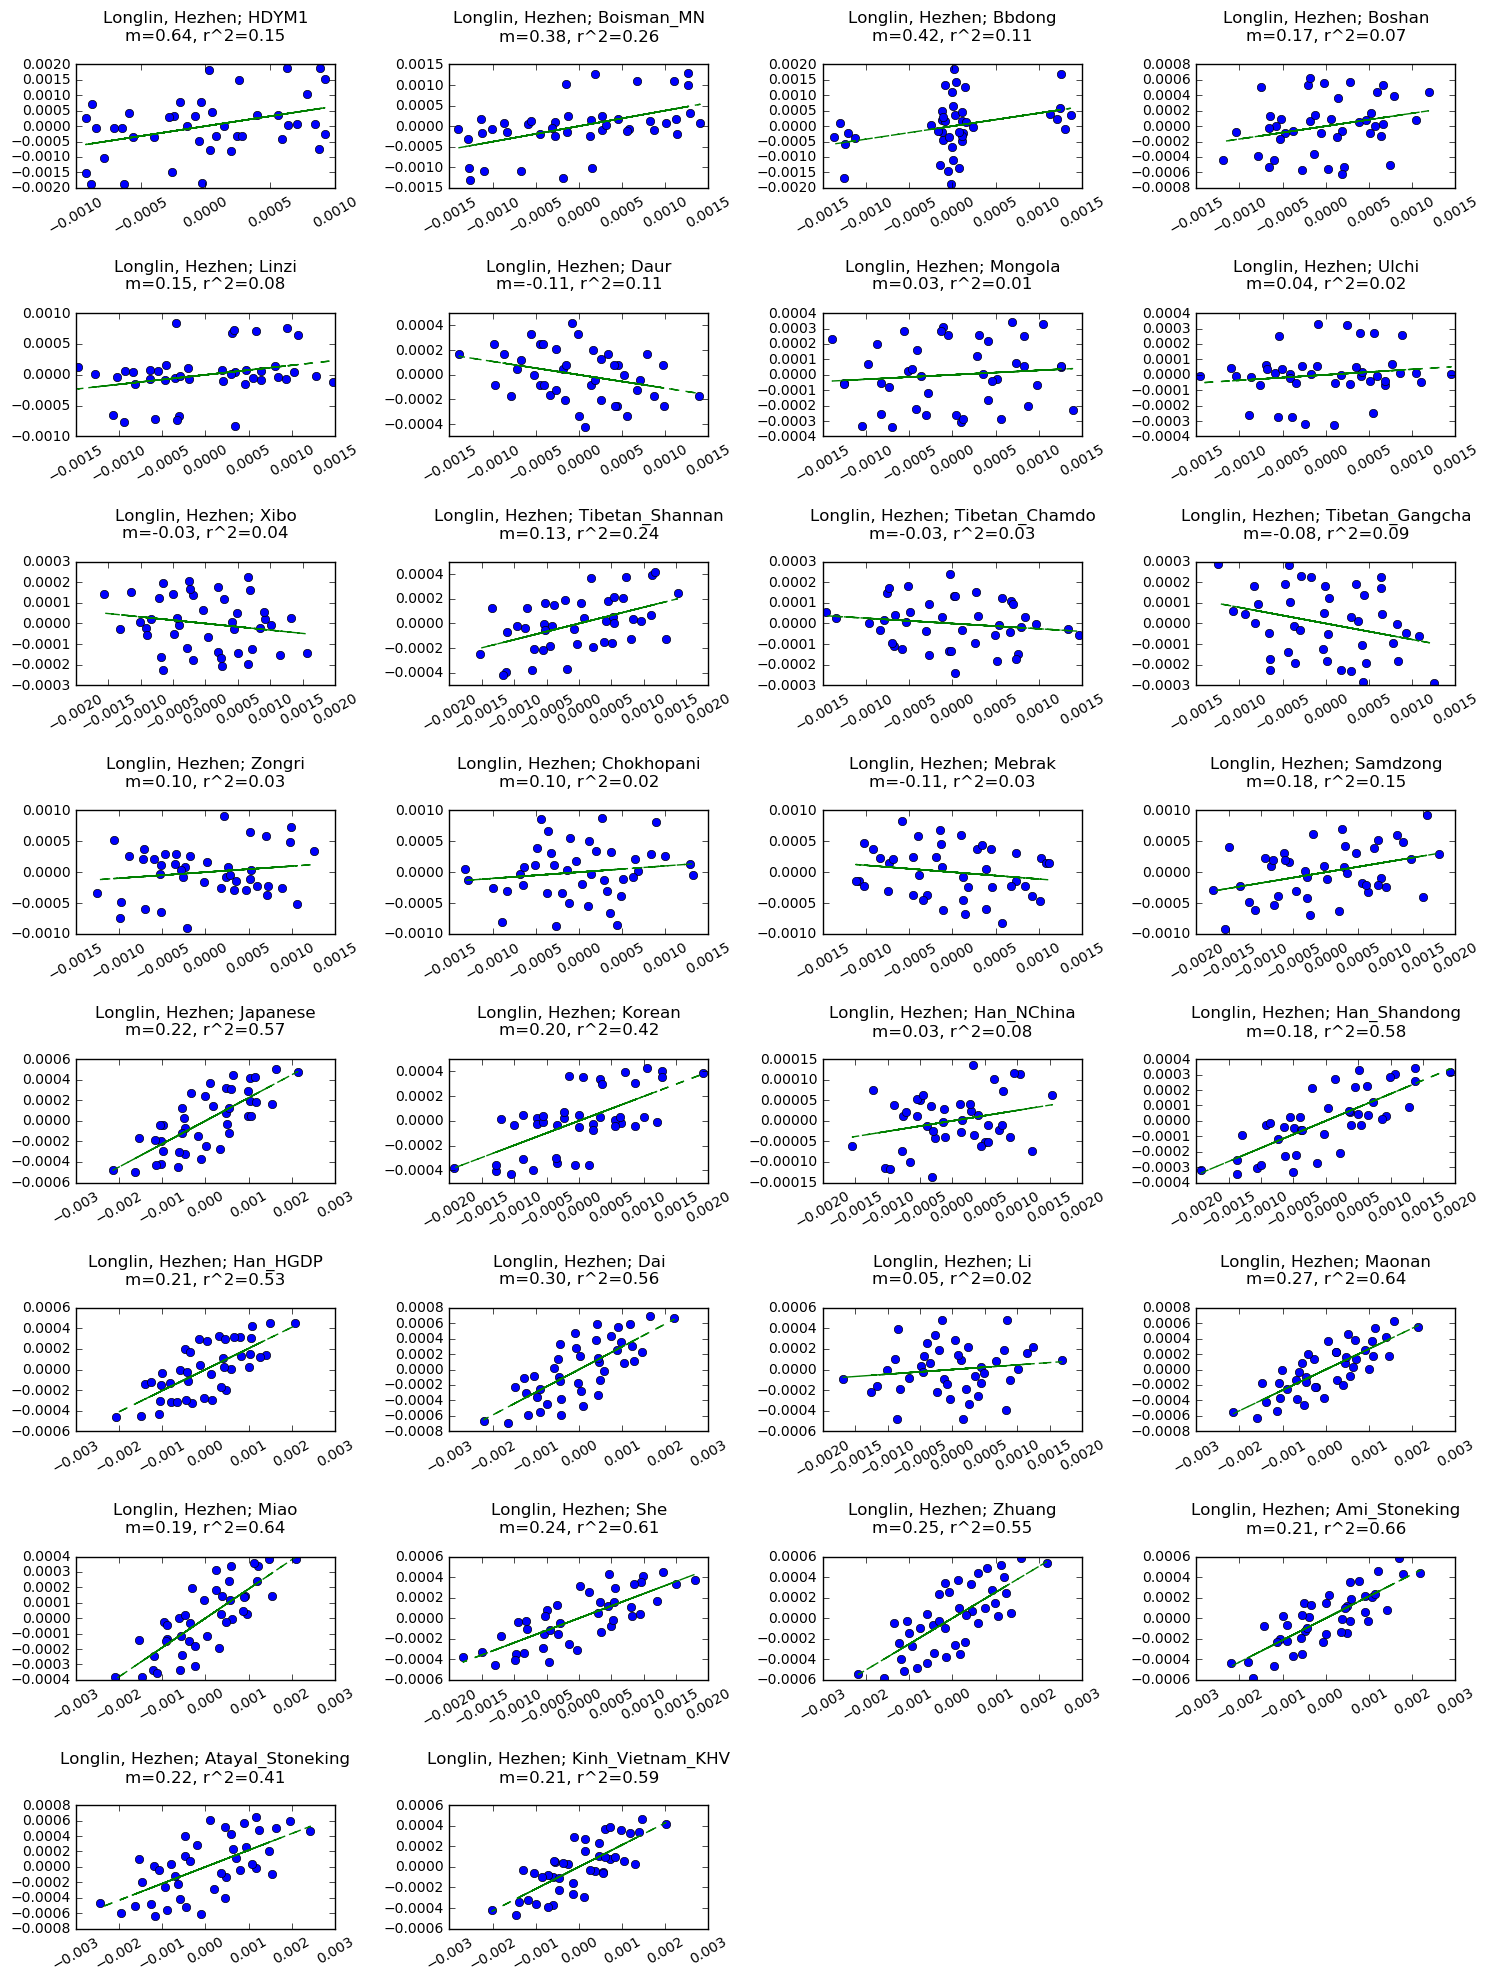

In [111]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import plotting_funcs as pf
from itertools import chain
import scipy.stats
#import HOdata

pD="/mnt/solexa/mel_yang/neolithic/adm_haakSI9/" #ivpp
outpd="/mnt/solexa/mel_yang/neolithic/adm_haakSI9/" #ivpp

outgroups=["Ju_hoan_North","Mbuti","Yoruba","UstIshim","Vestonice16","ElMiron","Tianyuan",
          "Papuan","Onge","Loschbour","Stuttgart"]
outgroups2=["Ju_hoan_North","Mbuti","Yoruba","UstIshim","Tianyuan","Papuan","Onge"]

weas=['Tibetan_Shannan','Tibetan_Chamdo','Tibetan_Gangcha','Zongri', 'Chokhopani', 'Mebrak', 'Samdzong']
neas=['HDYM1','Boisman_MN','Bbdong','Boshan','Linzi','Daur','Hezhen','Mongola','Ulchi','Xibo']
seas=['Japanese','Korean','Han_NChina','Han_Shandong','Han_HGDP','Dai','Li','Maonan','Miao','She',
       'Zhuang','Ami_Stoneking','Atayal_Stoneking','Kinh_Vietnam_KHV']

fh="ind_A_v13_TBH5"

mysets=[("Atayal_Stoneking","Longlin","Daur"),
        ("Atayal_Stoneking","LiangDao","Daur"),
        ("Mixe","Longlin","Malta1"),
        ("Mixe","Han_HGDP","Malta1"),
        ("Linzi","Boisman_MN","Atayal_Stoneking"),
        ("Boisman_MN","Mixe","Atayal_Stoneking"),
        ("Ulchi","Mixe","Atayal_Stoneking")]
mysets=[(i,"Atayal_Stoneking","Karitiana") for i in neas+weas+seas]
mysets=[(i,"Longlin","Hezhen") for i in neas+weas+seas]
#mysets=[(i,"Atayal_Stoneking","Longlin") for i in neas+weas+seas]
#mysets=[(i,"Hezhen","LiangDao") for i in neas+weas+seas]
#mysets=[(i,"Hezhen","Longlin") for i in neas+weas+seas]

bsf,bsfsubset=(0,'all')

def filemat2ary(myfilename,rowname=True,colname=True,comment="#"):
    myfile=open(myfilename,'r')
    colnamemarker=0
    rownames=[]
    for line in myfile: 
        if line[0] == comment: continue
        colnamemarker+=1
        x=line.split()
        rowmarker=1 if rowname==True else 0
        colmarker=2 if colname==True else 1
        if colname==True: 
            if colnamemarker==1: colnames=x[1:]; continue
        else: colnames=None
        if rowname==True: rownames.append(x[0])
        else: rownames=None
        
        if colnamemarker==colmarker: myary=np.array([float(i) if i!= "nan" else -500 for i in x[rowmarker:]])
        if colnamemarker>colmarker: myary=np.vstack((myary,np.array([float(i) if i!= "nan" else -500 for i in x[rowmarker:]])))
        
    return myary, rownames,colnames

num=1
fig = plt.figure(figsize=(15,20)) #
for A,R1,R2 in mysets:
    if A in [R1,R2]: continue
    subset1 = bsfsubset+'.'+A+'_'+R1+'_'+"Out"+'_'+"Out"
    subset2 = bsfsubset+'.'+A+'_'+R2+'_'+"Out"+'_'+"Out"

    myary1,myrows,mycols=filemat2ary("%s%s.f4.%s.Dmat" % (pD,fh,subset1))
    myary2,myrows,mycols=filemat2ary("%s%s.f4.%s.Dmat" % (pD,fh,subset2))
    
    outginds1=[outgroups.index(i) for i in outgroups if i not in ["Loschbour","Stuttgart","Vestonice16","ElMiron"]]
    myary1=myary1[outginds1,:][:,outginds1]
    myary2=myary2[outginds1,:][:,outginds1]
    
    outginds=[outgroups.index(i) for i in outgroups2]
    #subary1=myary1[outginds,:][:,outginds]
    #subary2=myary2[outginds,:][:,outginds]
    
    mylst1 = [i for i in list(chain.from_iterable(myary1)) if i != -500]
    mylst2 = [i for i in list(chain.from_iterable(myary2)) if i != -500]
    #sublst1 = [i for i in list(chain.from_iterable(subary1)) if i != -500]
    #sublst2 = [i for i in list(chain.from_iterable(subary2)) if i != -500]
    
    x,y=mylst1,mylst2
    #subx,suby=sublst1,sublst2
    #print x
    
    ##Regression
    #fit = np.polyfit(x,y,1)
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    fit_fn = np.poly1d(np.array([slope, intercept])) 
    m,r=slope,r_value
    ax1=fig.add_subplot(8,4,num)
    ax1.plot(x,y, 'o', x, fit_fn(x), '--')
    
    #slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(subx, suby)
    #fit_fn = np.poly1d(np.array([slope, intercept])) 
    #subm,subr=slope,r_value
    #ax1=fig.add_subplot(8,4,num)
    #ax1.plot(subx,suby, 'ro', subx, fit_fn(subx), 'r--')
    
    #ax1.plot(mylst1,mylst2,'o')
    #ax1.set_title("%s, %s; %s\nm=%.2f, r^2=%.2f\nm=%.2f, r^2=%.2f" % (R1, R2, A, m, r**2, subm, subr**2))
    ax1.set_title("%s, %s; %s\nm=%.2f, r^2=%.2f\n" % (R1, R2, A, m, r**2)) ##No subset
    
    for label in ax1.get_xmajorticklabels():label.set_rotation(30)
    num+=1
plt.tight_layout()

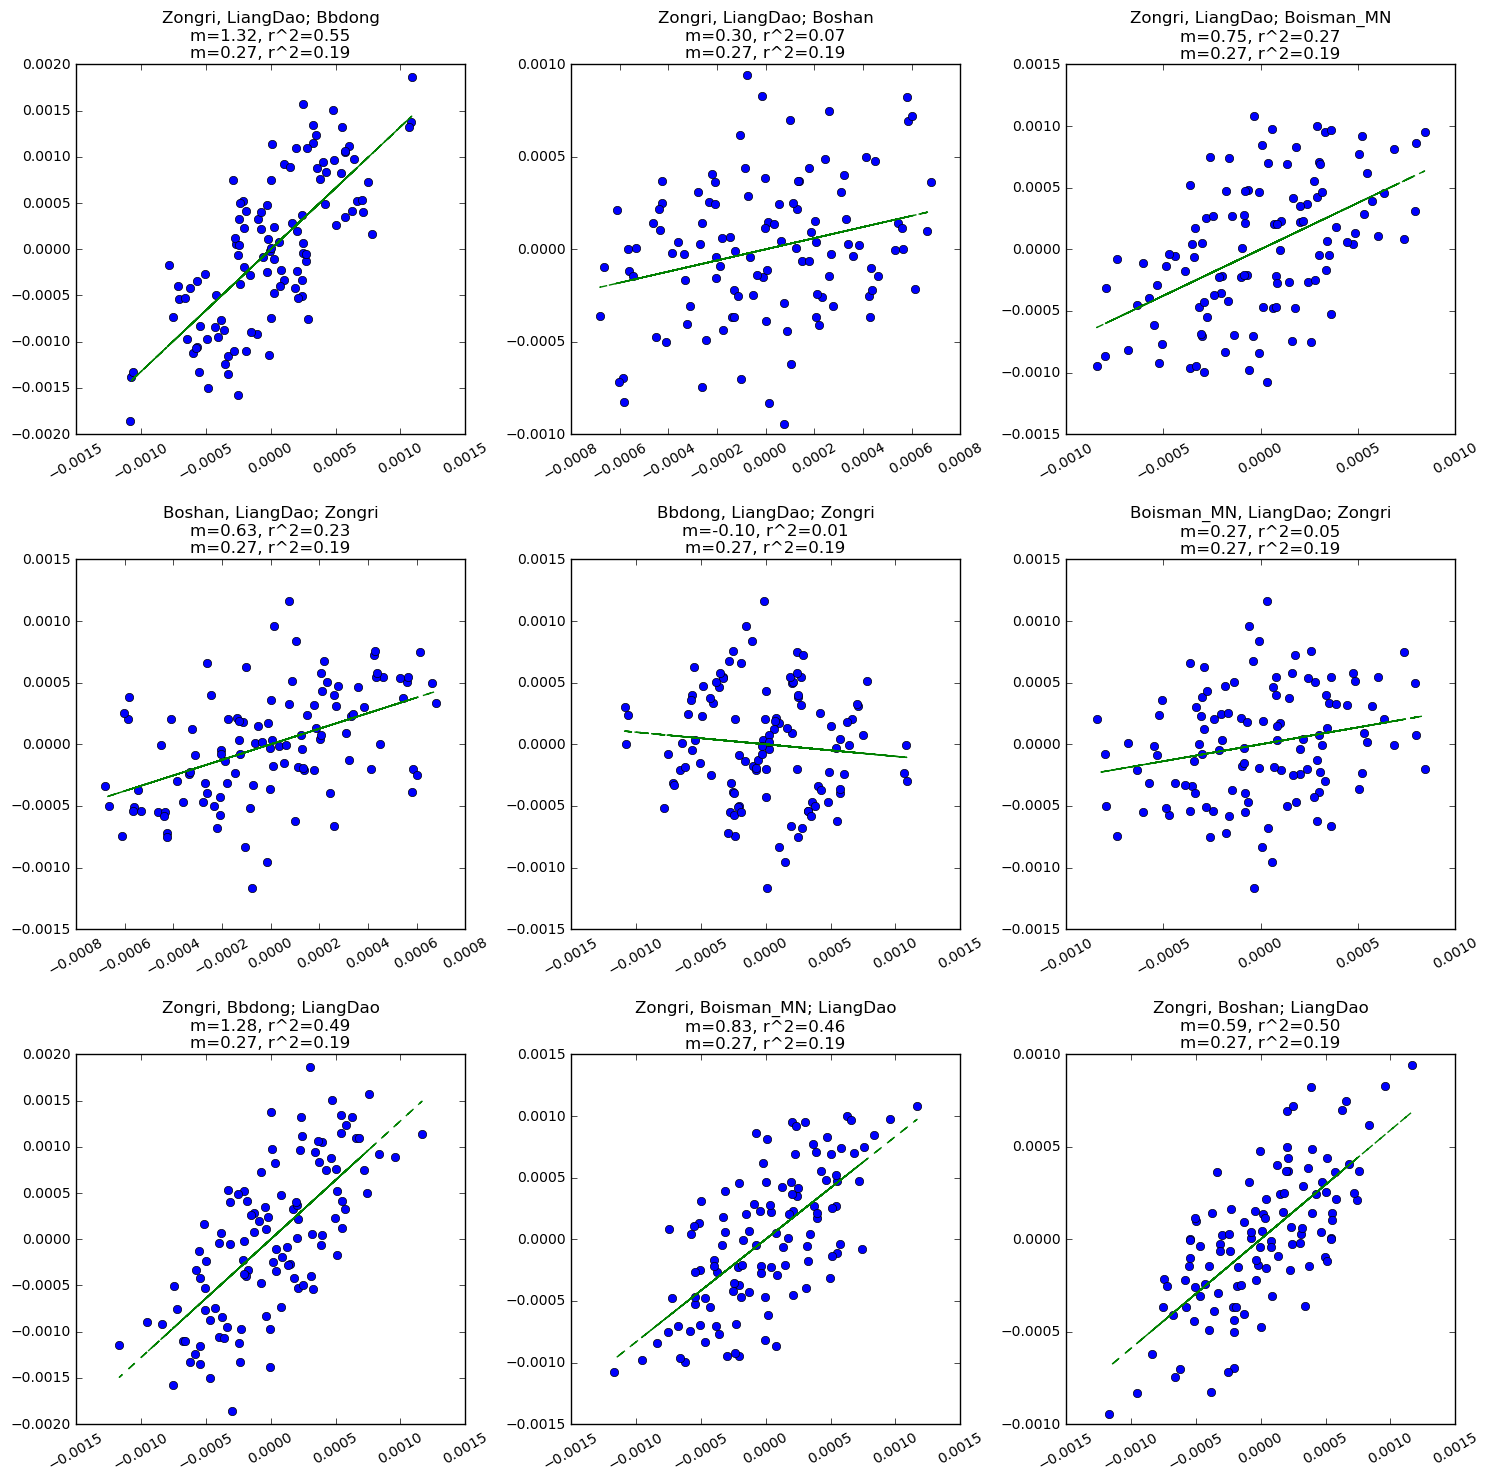

In [84]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import plotting_funcs as pf
from itertools import chain
import scipy.stats
#import HOdata

pD="/mnt/solexa/mel_yang/neolithic/adm_haakSI9/" #ivpp
outpd="/mnt/solexa/mel_yang/neolithic/adm_haakSI9/" #ivpp

outgroups=["Ju_hoan_North","Mbuti","Yoruba","UstIshim","Vestonice16","ElMiron","Tianyuan",
          "Papuan","Onge","Loschbour","Stuttgart"]
outgroups2=["Ju_hoan_North","Mbuti","Yoruba","UstIshim","Tianyuan","Papuan","Onge"]

weas=['Tibetan_Shannan','Tibetan_Chamdo','Tibetan_Gangcha','Zongri', 'Chokhopani', 'Mebrak', 'Samdzong']
neas=['HDYM1','Boisman_MN','Bbdong','Boshan','Linzi','Daur','Hezhen','Mongola','Ulchi','Xibo']
seas=['Japanese','Korean','Han_NChina','Han_Shandong','Han_HGDP','Dai','Li','Maonan','Miao','She',
       'Zhuang','Ami_Stoneking','Atayal_Stoneking','Kinh_Vietnam_KHV']

fh="ind_A_v13_TBH5"

mysets=[("Bbdong","Zongri","LiangDao"),
        ("Boshan","Zongri","LiangDao"),
        ("Boisman_MN","Zongri","LiangDao"),
        ("Zongri","Boshan","LiangDao"),
        ("Zongri","Bbdong","LiangDao"),
        ("Zongri","Boisman_MN","LiangDao"),
        ("LiangDao","Zongri","Bbdong"),
        ("LiangDao","Zongri","Boisman_MN"),
        ("LiangDao","Zongri","Boshan")]


bsf,bsfsubset=(0,'all')

def filemat2ary(myfilename,rowname=True,colname=True,comment="#"):
    myfile=open(myfilename,'r')
    colnamemarker=0
    rownames=[]
    for line in myfile: 
        if line[0] == comment: continue
        colnamemarker+=1
        x=line.split()
        rowmarker=1 if rowname==True else 0
        colmarker=2 if colname==True else 1
        if colname==True: 
            if colnamemarker==1: colnames=x[1:]; continue
        else: colnames=None
        if rowname==True: rownames.append(x[0])
        else: rownames=None
        
        if colnamemarker==colmarker: myary=np.array([float(i) for i in x[rowmarker:] if i!="nan"])
        if colnamemarker>colmarker: myary=np.vstack((myary,np.array([float(i) for i in x[rowmarker:] if i!="nan"])))
        
    return myary, rownames,colnames

num=1
fig = plt.figure(figsize=(15,15)) #
for A,R1,R2 in mysets:
    if A in [R1,R2]: continue
    subset1 = bsfsubset+'.'+A+'_'+R1+'_'+"Out"+'_'+"Out"
    subset2 = bsfsubset+'.'+A+'_'+R2+'_'+"Out"+'_'+"Out"
    myary1,myrows,mycols=filemat2ary("%s%s.f4.%s.Dmat" % (pD,fh,subset1))
    myary2,myrows,mycols=filemat2ary("%s%s.f4.%s.Dmat" % (pD,fh,subset2))
    
    #outginds=[outgroups.index(i) for i in outgroups2]
    #subary1=myary1[outginds,:][:,outginds]
    #subary2=myary2[outginds,:][:,outginds]
    
    mylst1 = list(chain.from_iterable(myary1))
    mylst2 = list(chain.from_iterable(myary2))
    #sublst1 = list(chain.from_iterable(subary1))
    #sublst2 = list(chain.from_iterable(subary2))
    
    x,y=mylst1,mylst2
    #subx,suby=sublst1,sublst2
    #print x
    
    ##Regression
    #fit = np.polyfit(x,y,1)
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    fit_fn = np.poly1d(np.array([slope, intercept])) 
    m,r=slope,r_value
    ax1=fig.add_subplot(3,3,num)
    ax1.plot(x,y, 'o', x, fit_fn(x), '--')
    
    #slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(subx, suby)
    #fit_fn = np.poly1d(np.array([slope, intercept])) 
    #subm,subr=slope,r_value
    #ax1=fig.add_subplot(3,3,num)
    #ax1.plot(subx,suby, 'ro', subx, fit_fn(subx), 'r--')
    
    #ax1.plot(mylst1,mylst2,'o')
    ax1.set_title("%s, %s; %s\nm=%.2f, r^2=%.2f\nm=%.2f, r^2=%.2f" % (R1, R2, A, m, r**2, subm, subr**2))
    
    for label in ax1.get_xmajorticklabels():label.set_rotation(30)
    num+=1
plt.tight_layout()